In [36]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


In [37]:
url <- "https://raw.githubusercontent.com/g-amadorz/dsci-project/refs/heads/main/data/players.csv"

players <- read_csv(url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [39]:
players_clean <- players |>
    mutate(age = Age) |>
    select(age, played_hours, subscribe) |>
    drop_na()

players_clean

age,played_hours,subscribe
<dbl>,<dbl>,<lgl>
9,30.3,TRUE
17,3.8,TRUE
17,0.0,FALSE
⋮,⋮,⋮
22,0.3,FALSE
17,0.0,FALSE
17,2.3,FALSE


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


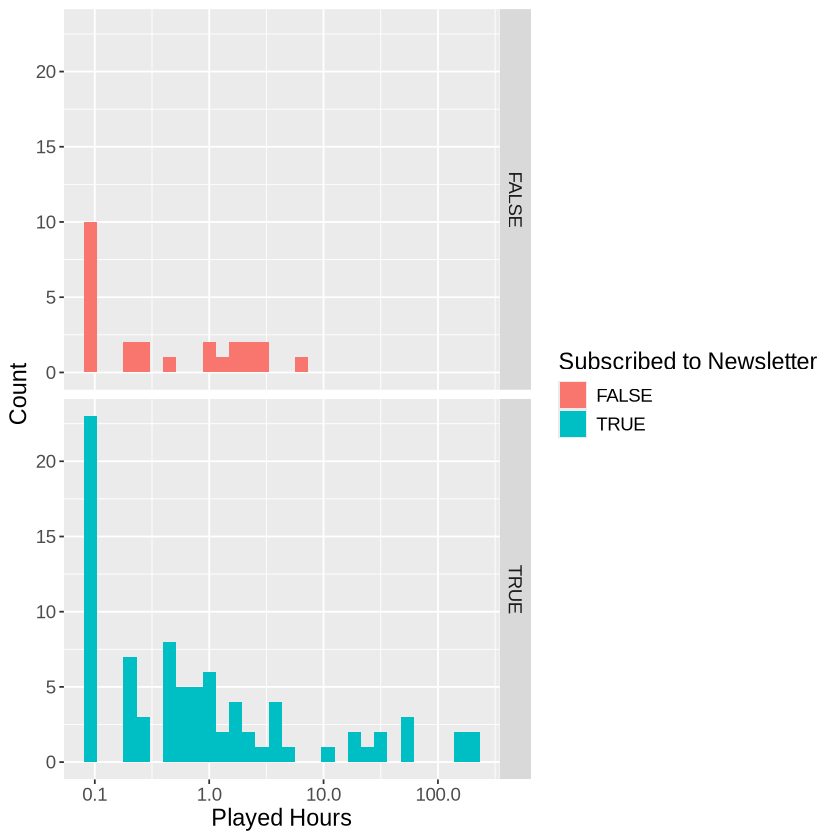

In [47]:

hours_played_hist <- players_clean |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram() +
    scale_x_log10() +
    facet_grid(rows=vars(subscribe)) +
    labs(x = "Played Hours", fill = "Subscribed to Newsletter", y = "Count") +
    theme(text = element_text(size = 14))

hours_played_hist
    

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_density()`).”


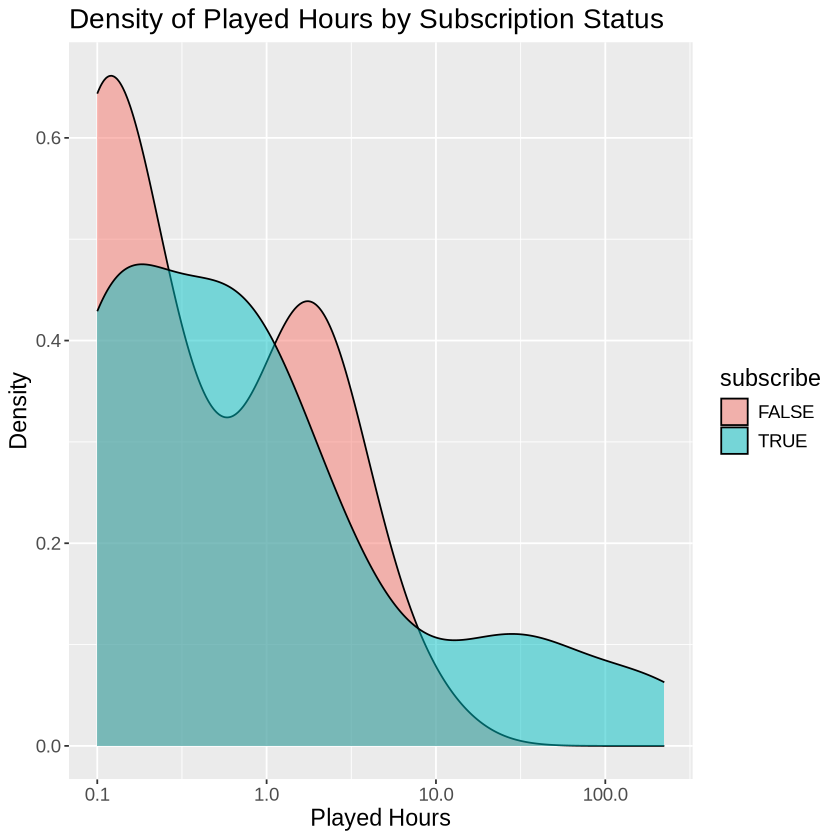

In [48]:
hours_played_density_plot <- players_clean |>
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_density(alpha = 0.5) +
    scale_x_log10() +
  labs(title = "Density of Played Hours by Subscription Status",
       x = "Played Hours",
       y = "Density") +
    theme(text = element_text(size = 14))

hours_played_density_plot

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


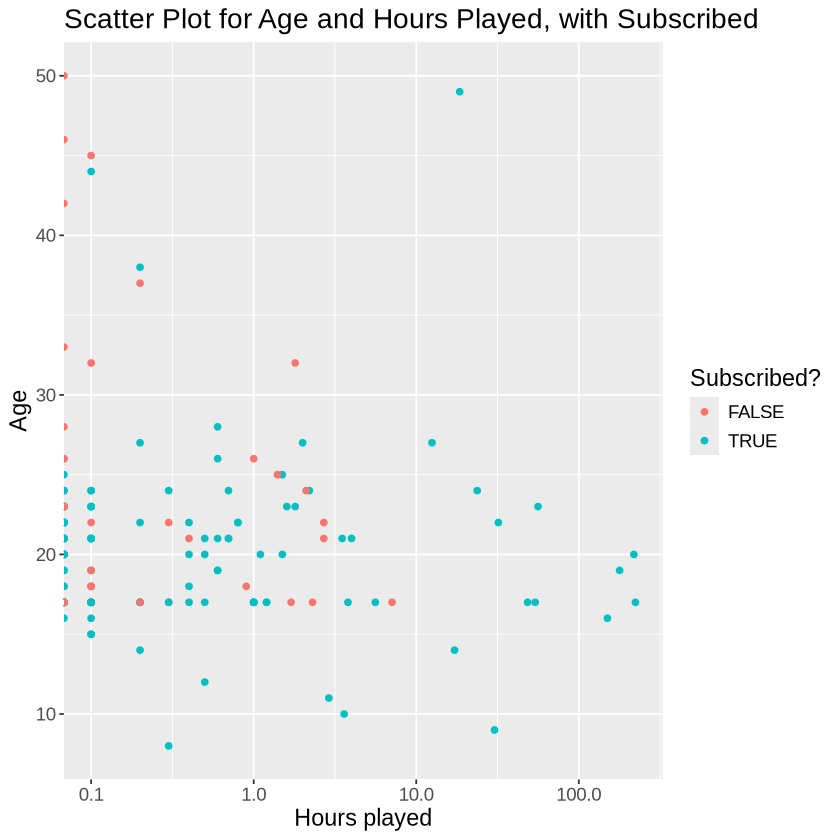

In [49]:
age_hours_scatter_plot <- players_clean |>
    ggplot(aes(x = played_hours, y = age, color = subscribe)) +
    geom_point() +
    scale_x_log10()+
    labs(x = "Hours played", 
         y = "Age", 
         color = "Subscribed?") +
            ggtitle("Scatter Plot for Age and Hours Played, with Subscribed") + 
            theme(text = element_text(size = 14))

age_hours_scatter_plot